In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile
%config IPCompleter.greedy=True

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
from urllib.request import urlretrieve
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'
urlretrieve(url, filename)

('pizza_steak.zip', <http.client.HTTPMessage at 0x1bcbdc7d220>)

In [4]:
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'conv_neural_nets.ipynb',
 'neural_network_classification.ipynb',
 'neural_network_regression.ipynb',
 'pizza_steak',
 'pizza_steak.zip',
 'USA_Housing.csv']

In [6]:
os.listdir("pizza_steak/")

['test', 'train']

In [7]:
os.listdir("pizza_steak/train/")

['pizza', 'steak']

In [8]:
os.listdir("pizza_steak/train/steak/")

['1000205.jpg',
 '100135.jpg',
 '101312.jpg',
 '1021458.jpg',
 '1032846.jpg',
 '10380.jpg',
 '1049459.jpg',
 '1053665.jpg',
 '1068516.jpg',
 '1068975.jpg',
 '1081258.jpg',
 '1090122.jpg',
 '1093966.jpg',
 '1098844.jpg',
 '1100074.jpg',
 '1105280.jpg',
 '1117936.jpg',
 '1126126.jpg',
 '114601.jpg',
 '1147047.jpg',
 '1147883.jpg',
 '1155665.jpg',
 '1163977.jpg',
 '1190233.jpg',
 '1208405.jpg',
 '1209120.jpg',
 '1212161.jpg',
 '1213988.jpg',
 '1219039.jpg',
 '1225762.jpg',
 '1230968.jpg',
 '1236155.jpg',
 '1241193.jpg',
 '1248337.jpg',
 '1257104.jpg',
 '126345.jpg',
 '1264050.jpg',
 '1264154.jpg',
 '1264858.jpg',
 '127029.jpg',
 '1289900.jpg',
 '1290362.jpg',
 '1295457.jpg',
 '1312841.jpg',
 '1313316.jpg',
 '1324791.jpg',
 '1327567.jpg',
 '1327667.jpg',
 '1333055.jpg',
 '1334054.jpg',
 '1335556.jpg',
 '1337814.jpg',
 '1340977.jpg',
 '1343209.jpg',
 '134369.jpg',
 '1344105.jpg',
 '134598.jpg',
 '1346387.jpg',
 '1348047.jpg',
 '1351372.jpg',
 '1362989.jpg',
 '1367035.jpg',
 '1371177.jpg',
 

In [9]:
len(os.listdir("pizza_steak/train/steak/"))

750

In [10]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak\test
There are 0 directories and 250 images in pizza_steak\test\pizza
There are 0 directories and 250 images in pizza_steak\test\steak
There are 2 directories and 0 images in pizza_steak\train
There are 0 directories and 750 images in pizza_steak\train\pizza
There are 0 directories and 750 images in pizza_steak\train\steak


In [11]:
num_steak_image = len(os.listdir("pizza_steak/train/steak"))
num_steak_image

750

In [12]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [13]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


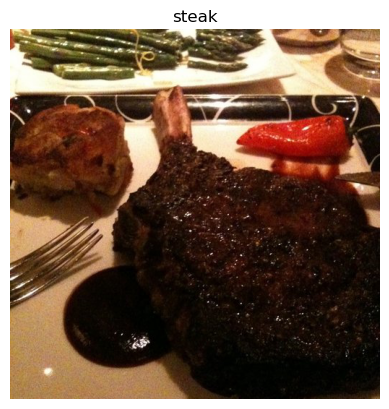

In [14]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [15]:
# View the img (actually just a big array/tensor)
img

array([[[172, 109,  55],
        [208, 152,  95],
        [223, 177, 118],
        ...,
        [142, 109,  55],
        [152, 119,  65],
        [157, 124,  70]],

       [[176, 111,  55],
        [191, 130,  75],
        [219, 169, 110],
        ...,
        [136, 103,  49],
        [141, 108,  54],
        [160, 127,  73]],

       [[163,  90,  35],
        [185, 119,  61],
        [203, 147,  88],
        ...,
        [141, 106,  52],
        [133, 100,  46],
        [153, 120,  66]],

       ...,

       [[172, 124,  48],
        [177, 131,  56],
        [189, 142,  72],
        ...,
        [112,  82,  44],
        [113,  85,  46],
        [103,  75,  36]],

       [[188, 141,  63],
        [186, 140,  65],
        [188, 141,  71],
        ...,
        [120,  91,  51],
        [110,  81,  41],
        [112,  83,  43]],

       [[177, 130,  52],
        [182, 134,  58],
        [187, 140,  68],
        ...,
        [139, 110,  70],
        [116,  87,  45],
        [131, 102,  60]]

In [16]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [17]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.6745098 , 0.42745098, 0.21568627],
        [0.81568627, 0.59607843, 0.37254902],
        [0.8745098 , 0.69411765, 0.4627451 ],
        ...,
        [0.55686275, 0.42745098, 0.21568627],
        [0.59607843, 0.46666667, 0.25490196],
        [0.61568627, 0.48627451, 0.2745098 ]],

       [[0.69019608, 0.43529412, 0.21568627],
        [0.74901961, 0.50980392, 0.29411765],
        [0.85882353, 0.6627451 , 0.43137255],
        ...,
        [0.53333333, 0.40392157, 0.19215686],
        [0.55294118, 0.42352941, 0.21176471],
        [0.62745098, 0.49803922, 0.28627451]],

       [[0.63921569, 0.35294118, 0.1372549 ],
        [0.7254902 , 0.46666667, 0.23921569],
        [0.79607843, 0.57647059, 0.34509804],
        ...,
        [0.55294118, 0.41568627, 0.20392157],
        [0.52156863, 0.39215686, 0.18039216],
        [0.6       , 0.47058824, 0.25882353]],

       ...,

       [[0.6745098 , 0.48627451, 0.18823529],
        [0.69411765, 0.51372549, 0.21960784],
        [0.74117647, 0

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 112s 2s/step - loss: 0.5751 - accuracy: 0.7053 - val_loss: 0.4211 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 125s 3s/step - loss: 0.4376 - accuracy: 0.8020 - val_loss: 0.3617 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 108s 2s/step - loss: 0.4006 - accuracy: 0.8307 - val_loss: 0.3232 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 118s 3s/step - loss: 0.3742 - accuracy: 0.8333 - val_loss: 0.3267 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 100s 2s/step - loss: 0.3092 - accuracy: 0.8800 - val_loss: 0.3057 - val_accuracy: 0.8640


In [6]:
model_1.summary()

NameError: name 'model_1' is not defined